In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

da = pd.read_csv(
    "C:/Users/eli/Desktop/nhanes_2015_2016.csv")

In [25]:

''' Question 1
Relabel the marital status variable DMDMARTL to have brief but informative character labels.
Then construct a frequency table of these values for all people, then for women only, and for men only.
Then construct these three frequency tables using only people whose age is between 30 and 40. '''

da["DMDMARTL"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living with partner",
                                      77: "Refused", 99: "Don't know"})

da["DMDMARTL"].value_counts()  # for all people

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTL, dtype: int64

In [26]:
da_group_by_gender = da.groupby(["RIAGENDR"])
da_group_by_gender.get_group(2)["DMDMARTL"].value_counts()  # for all women

Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Separated               118
Refused                   1
Name: DMDMARTL, dtype: int64

In [27]:
da_group_by_gender.get_group(1)["DMDMARTL"].value_counts()  # for all men

Married                1477
Never married           484
Living with partner     265
Divorced                229
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTL, dtype: int64

In [28]:
da[(da["RIDAGEYR"] >= 30) & (da["RIDAGEYR"] <= 40) & (da["RIAGENDR"] == 2)
   ].DMDMARTL.value_counts()  # for women with age between 30 and 40

Married                285
Never married          116
Living with partner     65
Divorced                46
Separated               18
Widowed                  2
Name: DMDMARTL, dtype: int64

In [29]:
da[(da["RIDAGEYR"] >= 30) & (da["RIDAGEYR"] <= 40) & (da["RIAGENDR"] == 1)
   ].DMDMARTL.value_counts()  # for men with age between 30 and 40

Married                275
Never married          101
Living with partner     78
Divorced                24
Separated               12
Widowed                  3
Refused                  1
Name: DMDMARTL, dtype: int64

In [33]:
''' Question 2 
Restricting to the female population, stratify the subjects into age bands no wider than ten years,
and construct the distribution of marital status within each age band. Within each age band,
present the distribution in terms of proportions that must sum to 1. '''
da_only_women = da[da["RIAGENDR"] == 2]
da_only_women["agegrp"] = pd.cut(da_only_women.RIDAGEYR, [
                                 10, 20, 30, 40, 50, 60, 70, 80])
df = da_only_women.groupby("agegrp")["DMDMARTL"].value_counts(
    normalize=True, ascending=False)
df

C:\Users\eli\AppData\Local\Temp/ipykernel_19452/4232644474.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_only_women["agegrp"] = pd.cut(da_only_women.RIDAGEYR, [


agegrp    DMDMARTL           
(10, 20]  Never married          0.769231
          Living with partner    0.205128
          Married                0.025641
(20, 30]  Never married          0.445525
          Married                0.305447
          Living with partner    0.206226
          Divorced               0.021401
          Separated              0.021401
(30, 40]  Married                0.544304
          Never married          0.204641
          Living with partner    0.120253
          Divorced               0.090717
          Separated              0.035865
          Widowed                0.004219
(40, 50]  Married                0.573705
          Divorced               0.137450
          Never married          0.125498
          Living with partner    0.073705
          Separated              0.065737
          Widowed                0.023904
(50, 60]  Married                0.546809
          Divorced               0.176596
          Never married          0.089362
    

In [34]:
''' Q2b. Repeat the construction for males. '''
da_only_men = da[da["RIAGENDR"] == 1]
da_only_men["agegrp"] = pd.cut(da_only_men.RIDAGEYR, [
    10, 20, 30, 40, 50, 60, 70, 80])
df = da_only_men.groupby("agegrp")["DMDMARTL"].value_counts(
    normalize=True, ascending=False)
df

C:\Users\eli\AppData\Local\Temp/ipykernel_19452/1012242819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_only_men["agegrp"] = pd.cut(da_only_men.RIDAGEYR, [


agegrp    DMDMARTL           
(10, 20]  Never married          0.900000
          Living with partner    0.075000
          Married                0.025000
(20, 30]  Never married          0.523148
          Married                0.238426
          Living with partner    0.212963
          Separated              0.016204
          Divorced               0.004630
          Widowed                0.004630
(30, 40]  Married                0.563319
          Never married          0.194323
          Living with partner    0.157205
          Divorced               0.052402
          Separated              0.026201
          Widowed                0.004367
          Refused                0.002183
(40, 50]  Married                0.703242
          Never married          0.097257
          Divorced               0.084788
          Living with partner    0.082294
          Separated              0.027431
          Widowed                0.004988
(50, 60]  Married                0.651982
    

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

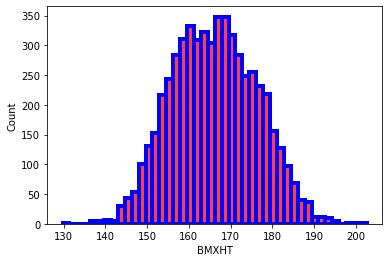

In [35]:
''' Question 3
Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample. '''
sns.histplot(data=da, x='BMXHT', color='red',
             edgecolor='blue', linewidth=4, kde=False)

<AxesSubplot:xlabel='BMXHT', ylabel='Count'>

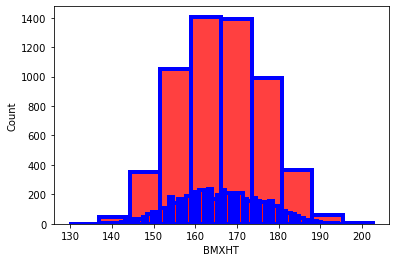

In [36]:
''' Q3a. Use the bins argument to distplot to produce histograms with different numbers of bins.
Assess whether the default value for this argument gives a meaningful result,
and comment on what happens as the number of bins grows excessively large or excessively small. '''
sns.histplot(data=da, x='BMXHT', color='red', bins=10,
             edgecolor='blue', linewidth=4, kde=False)
sns.histplot(data=da, x='BMXHT', color='red', bins=70,
             edgecolor='blue', linewidth=4, kde=False)
# When bins are excessively small it is difficult to see the count of different values and how data is spread.
# With too many bins the result is meaningless.

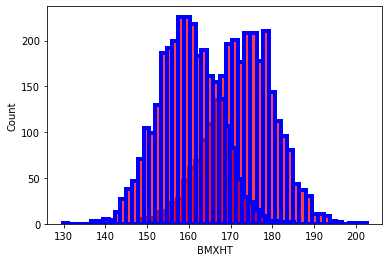

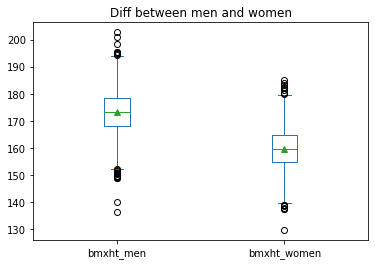

In [37]:
''' Q3b. Make separate histograms for the heights of women and men, then make a side-by-side boxplot
showing the heights of women and men. '''
da_only_men = da[da["RIAGENDR"] == 1]
da_only_women = da[da["RIAGENDR"] == 2]
sns.histplot(data=da_only_men, x='BMXHT', color='red',
             edgecolor='blue', linewidth=4, kde=False)
sns.histplot(data=da_only_women, x='BMXHT', color='red',
             edgecolor='blue', linewidth=4, kde=False)

DF = pd.DataFrame(
    {'bmxht_men': da_only_men['BMXHT'].dropna(), 'bmxht_women': da_only_women['BMXHT'].dropna()})
ax = DF[['bmxht_men', 'bmxht_women']].plot(
    kind='box', title='Diff between men and women', showmeans=True)
plt.show()

<AxesSubplot:xlabel='BPXSYDIF'>

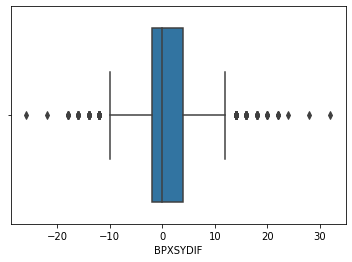

In [38]:
''' Question 4
Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure
measurents (BPXSY1 and BPXSY2). '''
da["BPXSYDIF"] = (da.BPXSY1-da.BPXSY2)
sns.boxplot(x=da["BPXSYDIF"].dropna())

In [39]:
''' Q4a. What proportion of the subjects have a lower SBP on the second reading compared to the first? '''
mean_bpxsy1 = da["BPXSY1"].mean()
mean_bpxsy2 = da["BPXSY2"].mean()
diff = mean_bpxsy1 - mean_bpxsy2
print(diff) 

0.30159679687274377


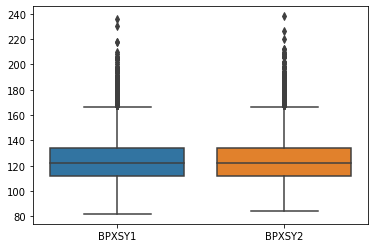

In [40]:
''' Q4b. Make side-by-side boxplots of the two systolic blood pressure variables.'''
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])

In [41]:
''' Q4c. Comment on the variation within either the first or second systolic blood pressure measurements,
and the variation in the within-subject differences between the first and second systolic blood pressure measurements. '''
da["BPXSYDIF"].dropna().describe()
# The First sistolic blood pressure measurements have higher median than the second blood pressure measurements, but
# but not drastically higher. The second systolic blood pressure measurements have more outliers.
# 50% have diff between BPXSY1 and BPXSY2 above and bellow 0.67 mm/Hg (the median).
# The bottom 25% have diff bellow -2(Q1), which means higher BPXSY2.
# The top 25% (Q3) have diff higher than 4 mm/Hg.
# Min diff is -26 mm/Hg and max diff is 32 mm/Hg.

count    5369.000000
mean        0.674986
std         5.046465
min       -26.000000
25%        -2.000000
50%         0.000000
75%         4.000000
max        32.000000
Name: BPXSYDIF, dtype: float64

In [42]:
''' Question 5
Construct a frequency table of household sizes for people within each educational attainment category
(the relevant variable is DMDEDUC2). Convert the frequencies to proportions. '''
da["DMDEDUC2"] = da.DMDEDUC2.replace({1: "Less than 9th grade", 2: "9-11th grade (Includes 12th grade with no diploma)",
                                      3: "High school graduate/GED or equivalent", 4: "Some college or AA degree",
                                      5: "College graduate or above",
                                      7: "Refused", 9: "Don't know"})
da["DMDEDUC2"] = da["DMDEDUC2"].dropna()
da.groupby("DMDEDUC2")["DMDHHSIZ"].value_counts(normalize=True)

DMDEDUC2                                            DMDHHSIZ
9-11th grade (Includes 12th grade with no diploma)  2           0.222395
                                                    3           0.163297
                                                    4           0.152411
                                                    5           0.146190
                                                    1           0.116641
                                                    6           0.113530
                                                    7           0.085537
College graduate or above                           2           0.347731
                                                    3           0.193997
                                                    4           0.165447
                                                    1           0.142753
                                                    5           0.095168
                                                    6          

In [43]:
''' Q5b. Restrict the sample to people between 30 and 40 years of age. 
Then calculate the median household size for women and men within each level of educational attainment. '''
da_only_men = da[(da["RIAGENDR"] == 1) & (
    da["RIDAGEYR"] >= 30) & (da["RIDAGEYR"] <= 40)]
da_only_women = da[(da["RIAGENDR"] == 2) & (
    da["RIDAGEYR"] >= 30) & (da["RIDAGEYR"] <= 40)]
da_only_men.groupby("DMDEDUC2")["DMDHHSIZ"].median()
da_only_women.groupby("DMDEDUC2")["DMDHHSIZ"].median()

DMDEDUC2
9-11th grade (Includes 12th grade with no diploma)    5.0
College graduate or above                             3.0
High school graduate/GED or equivalent                5.0
Less than 9th grade                                   5.0
Some college or AA degree                             4.0
Name: DMDHHSIZ, dtype: float64

In [53]:
''' Question 6
The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables SDMVSTRA
and SDMVPSU. Calculate the mean age (RIDAGEYR), height (BMXHT), and BMI (BMXBMI) for each gender (RIAGENDR),
within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs. '''
da['MVU'] = da.groupby(['SDMVSTRA', 'SDMVPSU']).grouper.group_info[0]
da_men = da[(da["RIAGENDR"] == 1)]
da_women = da[(da["RIAGENDR"] == 2)]

df_men = da_men.groupby(["MVU"])[["RIDAGEYR", "BMXHT",
                                 "BMXBMI"]].mean() # mean for men
df_men

,RIDAGEYR,BMXHT,BMXBMI
MVU,,,
0,47.861111,172.741667,26.958333
1,54.363636,172.906818,27.160465
2,43.130000,169.537755,30.939175
3,45.219178,173.075342,27.727397
4,46.750000,172.177885,29.416505
5,42.063158,174.764516,26.273118
6,44.653061,173.998969,28.528866
7,44.320000,170.332323,25.744444
8,47.829787,174.315217,29.231522


In [55]:
df_women = da_women.groupby(
    ["MVU"])[["RIDAGEYR", "BMXHT", "BMXBMI"]].mean()  # mean for women
df_women

,RIDAGEYR,BMXHT,BMXBMI
MVU,,,
0,47.663265,159.570408,30.052041
1,52.987952,159.244578,27.849398
2,43.636364,155.402041,32.419388
3,43.736111,159.218056,27.400000
4,44.397959,158.871579,30.856842
5,44.376344,160.229032,26.470968
6,42.897436,161.315385,29.447436
7,47.333333,157.231111,26.611111
8,44.841121,162.059615,29.905769


In [56]:

# report the ratio between the largest and smallest mean
print(df_men["RIDAGEYR"].max() / df_men["RIDAGEYR"].min())
print(df_women["RIDAGEYR"].max() / df_women["RIDAGEYR"].min())

print(df_men["BMXHT"].max() / df_men["BMXHT"].min())
print(df_women["BMXHT"].max() / df_women["BMXHT"].min())

print(df_men["BMXBMI"].max() / df_men["BMXBMI"].min())
print(df_women["BMXBMI"].max() / df_women["BMXBMI"].min())

1.3114871069416525
1.3078580577111432
1.0451744119496282
1.047949694040641
1.2332369443245577
1.2460491548963397


In [63]:
''' Q6a. Comment on the extent to which mean age, height, and BMI vary among the MVUs.'''
# The mean age vary the most among the MVU, because the standard deviation is biggest.
''' Q6b. Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.
 Report the ratio between the largest and smalles IQR across the MVUs. '''
print(df_men["RIDAGEYR"].describe())  # IQR = 50,70 - 45,36
print(df_women["RIDAGEYR"].describe())  # IQR = 50,89 - 44,51

count    30.000000
mean     48.320132
std       3.809722
min      42.063158
25%      45.358261
50%      48.053363
75%      50.696338
max      55.165289
Name: RIDAGEYR, dtype: float64
count    30.000000
mean     47.512822
std       3.741028
min      42.541667
25%      44.508750
50%      46.760302
75%      50.884009
max      55.638462
Name: RIDAGEYR, dtype: float64


In [61]:
print(df_men["BMXHT"].describe())
print(df_women["BMXHT"].describe())

count     30.000000
mean     173.143162
std        1.824414
min      169.325000
25%      172.126228
50%      173.106820
75%      174.456255
max      176.974157
Name: BMXHT, dtype: float64
count     30.000000
mean     159.725022
std        1.828171
min      155.402041
25%      158.809427
50%      160.041003
75%      160.998694
max      162.853521
Name: BMXHT, dtype: float64


In [62]:
print(df_men["BMXBMI"].describe())
print(df_women["BMXBMI"].describe())

count    30.000000
mean     28.687020
std       1.475871
min      25.744444
25%      27.717376
50%      28.886547
75%      29.371817
max      31.749000
Name: BMXBMI, dtype: float64
count    30.000000
mean     29.781346
std       1.687687
min      26.470968
25%      28.730634
50%      29.877095
75%      30.752982
max      32.984127
Name: BMXBMI, dtype: float64
